In [149]:
import pandas as pd
import main_functions as functions
import importlib
import matplotlib.pyplot as plt

In [150]:
importlib.reload(functions)
fr_data = pd.read_csv('Data/Fertility rates.csv', skiprows=4)
covid_data = pd.read_csv('Data/WHO-COVID-19-global-data.csv')
polio_data = pd.read_csv('Data/the-number-of-reported-paralytic-polio-cases.csv')
usa_fr = functions.ext_sel_fr(fr_data, 'USA', 1975, 2021)
usa_covid = functions.ext_sel_covid(covid_data, 'US')
chn_polio = functions.ext_sel_polio(polio_data, 'CHN')
#print(chn_polio)

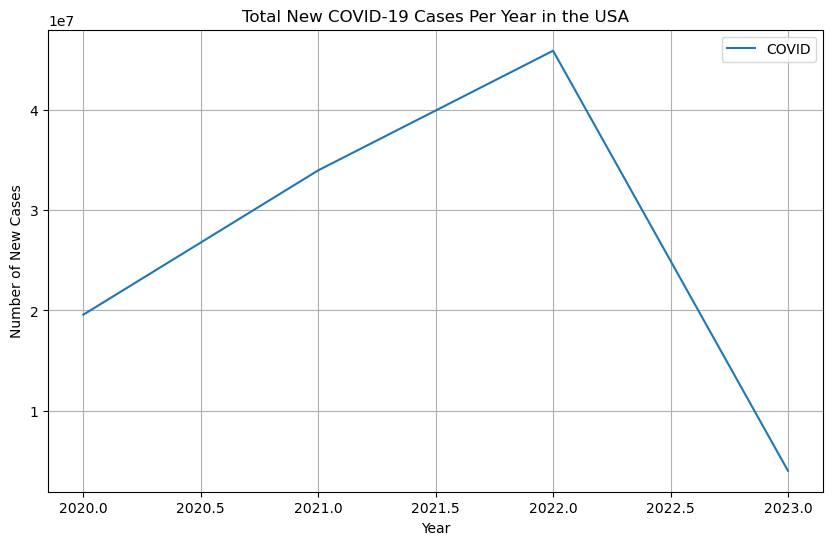

In [151]:
plt.figure(figsize=(10, 6))
plt.plot(usa_covid, label = 'COVID')
plt.title('Total New COVID-19 Cases Per Year in the USA')
plt.xlabel('Year')
plt.ylabel('Number of New Cases')
plt.grid(True)
plt.legend()
plt.show()

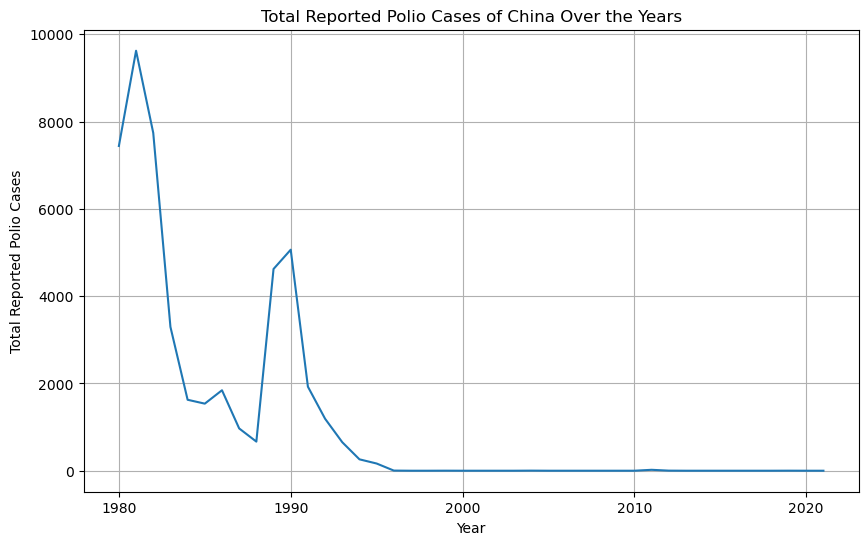

In [152]:
plt.figure(figsize=(10, 6))
plt.plot(chn_polio['Year'], chn_polio['Total (reported) polio cases'])
plt.title('Total Reported Polio Cases of China Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Reported Polio Cases')
plt.grid(True)
plt.show()